In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [9]:
print(sns.__version__)

0.11.0


In [10]:
df = pd.read_csv("GDP_Origin.csv")

In [14]:
# Clean dataframe - step 0
# Check if there are null / NaN values in dataframe

print({"countNaNRows": df.isna().sum()})
print({"countDuplicatesRows": df.duplicated().sum()})

{'countNaNRows': Cntry                  0
LegEnvt                0
GeogZone1              0
IntalCCY               0
GdpGwth                0
Year                   1
FxRate                 0
InflatioIndx           0
OECDSTInterbkRate    165
M3                    45
dtype: int64}
{'countDuplicatesRows': 18}


In [15]:
# Clean dataframe - step 1
# Remove duplicates, NaN & Null values from dataframe

df = df.dropna()
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 9 to 726
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cntry              555 non-null    object 
 1   LegEnvt            555 non-null    object 
 2   GeogZone1          555 non-null    object 
 3   IntalCCY           555 non-null    object 
 4   GdpGwth            555 non-null    float64
 5   Year               555 non-null    float64
 6   FxRate             555 non-null    float64
 7   InflatioIndx       555 non-null    float64
 8   OECDSTInterbkRate  555 non-null    float64
 9   M3                 555 non-null    float64
dtypes: float64(6), object(4)
memory usage: 47.7+ KB


In [16]:
# Clean dataframe - step 2
# Modify dataframe columns to fit the project's needs

df['Year'] = df['Year'].astype(int)
df['LogFxRate'] = np.log(df['FxRate'])
df['LogM3'] = np.log(df['M3'])
df['LogInflatioIndx'] = np.log(df['InflatioIndx'])
df = df.drop(columns=['FxRate', 'M3', 'InflatioIndx'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 9 to 726
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cntry              555 non-null    object 
 1   LegEnvt            555 non-null    object 
 2   GeogZone1          555 non-null    object 
 3   IntalCCY           555 non-null    object 
 4   GdpGwth            555 non-null    float64
 5   Year               555 non-null    int32  
 6   OECDSTInterbkRate  555 non-null    float64
 7   LogFxRate          555 non-null    float64
 8   LogM3              555 non-null    float64
 9   LogInflatioIndx    555 non-null    float64
dtypes: float64(5), int32(1), object(4)
memory usage: 45.5+ KB


In [73]:
df.head()

,Cntry,LegEnvt,GeogZone1,IntalCCY,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate,LogM3
9,Australia,Common Wealth,Asia & Pacific,AUD,2,"1,990",1,69,13,17,0,3
10,Australia,Common Wealth,Asia & Pacific,AUD,-1,"1,991",1,71,8,18,0,3
11,Australia,Common Wealth,Asia & Pacific,AUD,3,"1,992",1,72,6,19,0,3
12,Australia,Common Wealth,Asia & Pacific,AUD,4,"1,993",1,73,5,20,0,3
13,Australia,Common Wealth,Asia & Pacific,AUD,5,"1,994",1,75,7,22,0,3


In [28]:
df.dtypes

Cntry                 object
LegEnvt               object
GeogZone1             object
IntalCCY              object
GdpGwth              float64
Year                 float64
FxRate               float64
InflatioIndx         float64
OECDSTInterbkRate    float64
M3                   float64
LogFxRate            float64
dtype: object

In [24]:
df.isnull().sum()
# No more null values

df.isna().sum()
# Same for NaN values

Cntry                0
LegEnvt              0
GeogZone1            0
IntalCCY             0
GdpGwth              0
Year                 0
FxRate               0
InflatioIndx         0
OECDSTInterbkRate    0
M3                   0
LogFxRate            0
dtype: int64

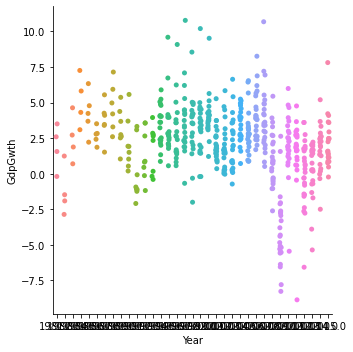

In [14]:
sns.catplot(x='Year',y='GdpGwth', data=df)
plt.show()

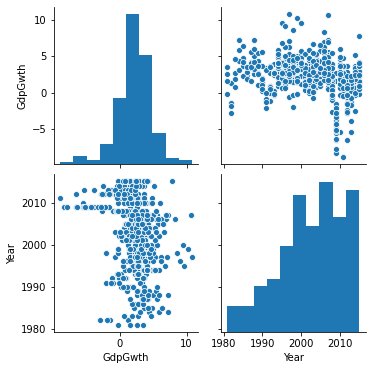

In [4]:
sns.pairplot(data=df[['GdpGwth', 'Year']])
plt.show()

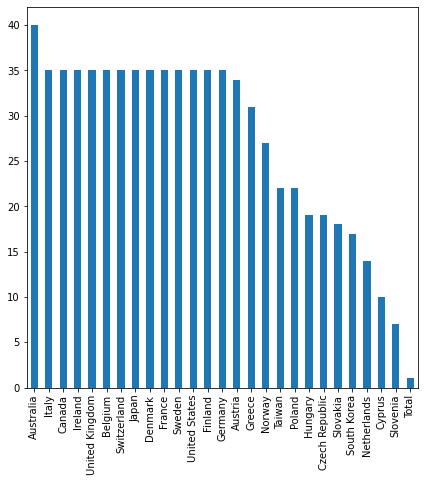

In [10]:
plt.figure(figsize=(7, 7))
df['Cntry'].value_counts().plot.bar()
plt.show()

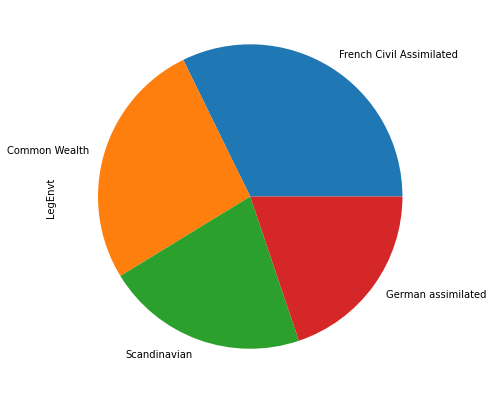

In [64]:
plt.figure(figsize=(15,7))
df["LegEnvt"].value_counts().plot.pie()
plt.show()

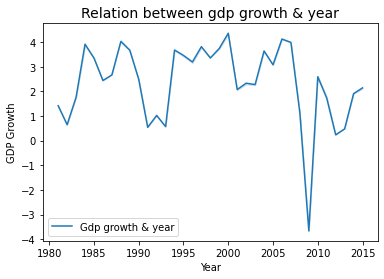

In [14]:
ax = sns.lineplot(x='Year', y='GdpGwth', label='Gdp growth & year',
 data=df, ci=False)
plt.title('Relation between gdp growth & year', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('GDP Growth')
plt.show()

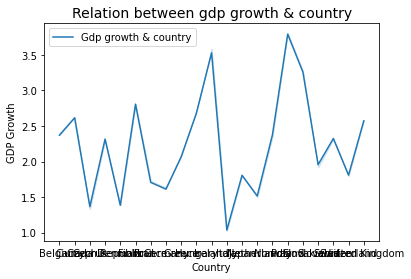

In [48]:
ax = sns.lineplot(x='Cntry', y='GdpGwth', label='Gdp growth & country',
 data=df, ci=False)
plt.title('Relation between gdp growth & country', fontsize=14)
ax.set_xlabel('Country')
ax.set_ylabel('GDP Growth')
plt.show()

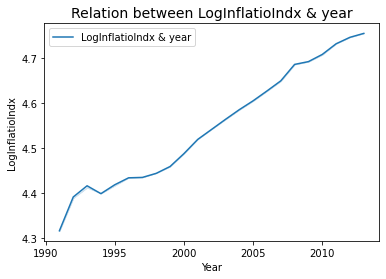

In [40]:
ax = sns.lineplot(x='Year', y='LogInflatioIndx', label='LogInflatioIndx & year',
 data=df, ci=False)
plt.title('Relation between LogInflatioIndx & year', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('LogInflatioIndx') 
plt.show()

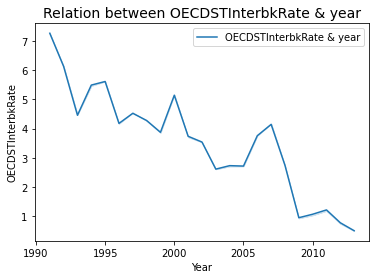

In [55]:
ax = sns.lineplot(x='Year', y='OECDSTInterbkRate', label='OECDSTInterbkRate & year',
 data=df, ci=False)
plt.title('Relation between OECDSTInterbkRate & year', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('OECDSTInterbkRate') 
plt.show()

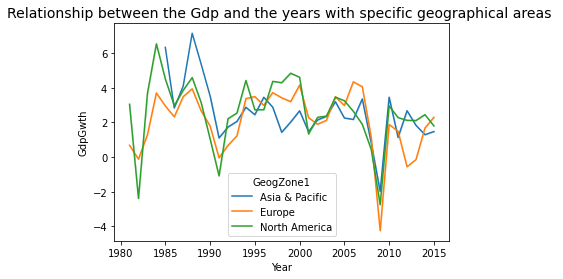

In [26]:
ax = sns.lineplot(x='Year', y='GdpGwth', hue="GeogZone1",
 data=df, ci=False)
plt.title('Relationship between the Gdp and the years with specific geographical areas ', fontsize=14)
# ax.set_ylabel('GDP Growth')
plt.show()

[Text(0, 0.5, 'Gdp growth')]

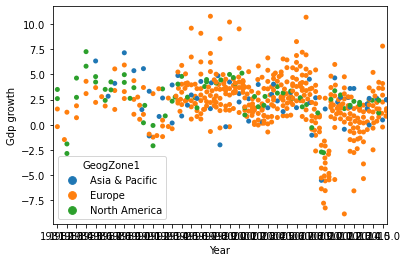

In [9]:
ax = sns.swarmplot(data=df, x="Year", y="GdpGwth", hue="GeogZone1", size=5)
ax.set(ylabel="Gdp growth")

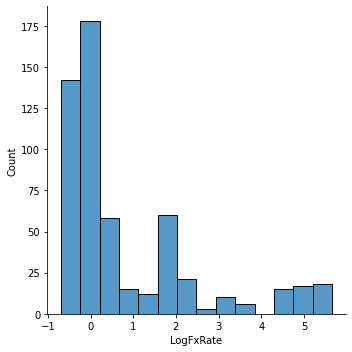

In [17]:
import seaborn as sns
sns.displot(df["LogFxRate"])
plt.show()

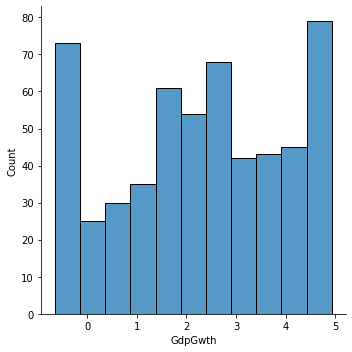

In [57]:
sns.displot(df["GdpGwth"])
plt.show()

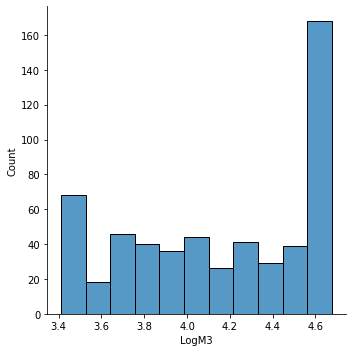

In [58]:
sns.displot(df["LogM3"])
plt.show()

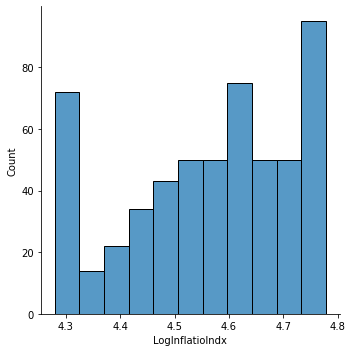

In [59]:
sns.displot(df["LogInflatioIndx"])
plt.show()

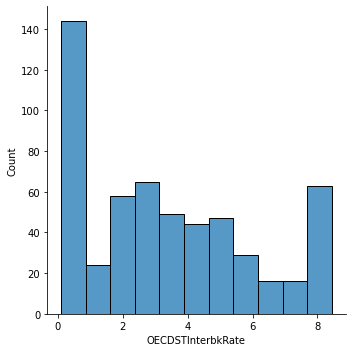

In [60]:
sns.displot(df["OECDSTInterbkRate"])
plt.show()

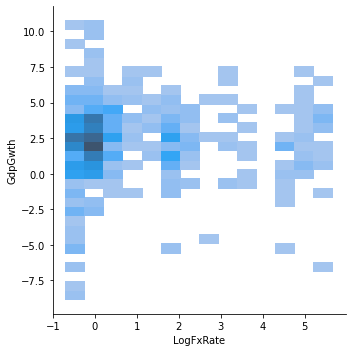

In [18]:
sns.displot(x='LogFxRate',y="GdpGwth", data=df)

<AxesSubplot:xlabel='Year', ylabel='GdpGwth'>

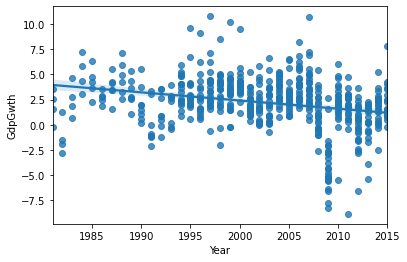

In [20]:
sns.regplot(x="Year",y="GdpGwth",data=df)

<AxesSubplot:xlabel='LogM3', ylabel='GdpGwth'>

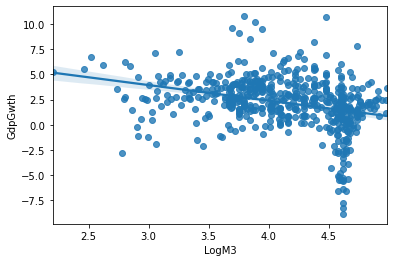

In [22]:
sns.regplot(x="LogM3",y="GdpGwth",data=df)

In [29]:
# DATA CALCUL :

# - Central tendency,
# - Dispersion measure of the data set
# - Minimum, Maximum,
# - Frequency table 25%, 50%, 75%
# - Count of observations

df.describe()

,GdpGwth,Year,OECDSTInterbkRate,LogFxRate,LogM3,LogInflatioIndx
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,2.193508,2002.609009,3.796247,0.827343,4.127608,4.548408
std,2.590464,8.296856,3.914655,1.606957,0.521550,0.209153
min,-8.864000,1981.000000,-2.000000,-0.694847,2.199068,3.624516
25%,0.961000,1997.000000,0.628500,-0.257657,3.781710,4.458826
50%,2.386000,2003.000000,3.090000,0.058721,4.211406,4.586334
75%,3.699000,2009.000000,5.230000,1.733468,4.605170,4.690250
max,10.778000,2015.000000,28.000000,5.658192,4.988417,5.004510


In [30]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,GdpGwth,Year,OECDSTInterbkRate,LogFxRate,LogM3,LogInflatioIndx
count,555,555,555,555,555,555
mean,2,"2,003",4,1,4,5
std,3,8,4,2,1,0
min,-9,"1,981",-2,-1,2,4
25%,1,"1,997",1,-0,4,4
50%,2,"2,003",3,0,4,5
75%,4,"2,009",5,2,5,5
max,11,"2,015",28,6,5,5


In [31]:
import scipy.stats as sp
df_o = pd.DataFrame()
for col in df.columns:
     df_o[col] = sp.mstats.winsorize(df[col], limits=0.1, inplace=True)
        
df_o.describe()

,GdpGwth,Year,OECDSTInterbkRate,LogFxRate,LogM3,LogInflatioIndx
count,555,555,555,555,555,555
mean,2,"2,003",3,1,4,5
std,2,7,3,1,0,0
min,-1,"1,991",0,-0,3,4
25%,1,"1,997",1,-0,4,4
50%,2,"2,003",3,0,4,5
75%,4,"2,009",5,2,5,5
max,5,"2,013",8,3,5,5


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Cntry', ylabel='Year'>

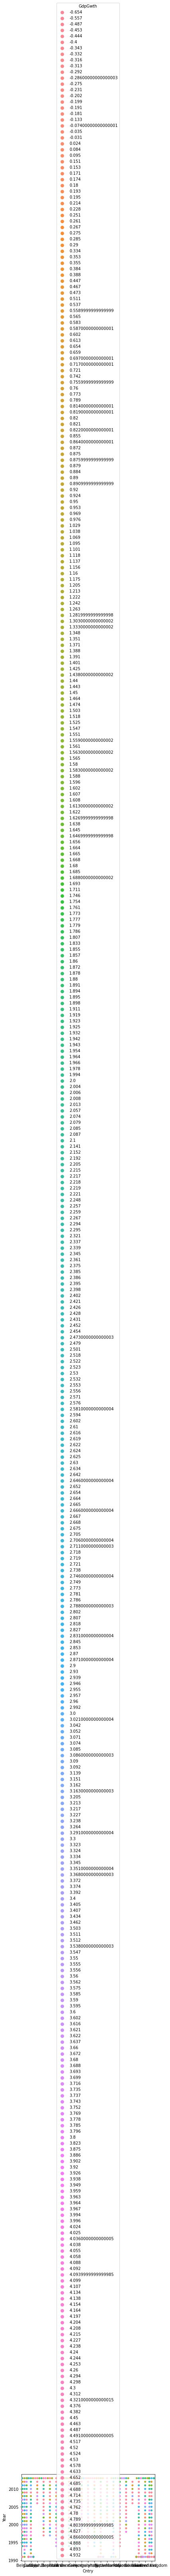

In [33]:
sns.swarmplot(data=df_o, x="Cntry", y="Year", hue="GdpGwth", size=5)

In [34]:
df_o.head()

,Cntry,LegEnvt,GeogZone1,IntalCCY,GdpGwth,Year,OECDSTInterbkRate,LogFxRate,LogM3,LogInflatioIndx
0,Belgium,Common Wealth,Asia & Pacific,CAD,2,1991,8,0,3,4
1,Belgium,Common Wealth,Asia & Pacific,CAD,-1,1991,8,0,3,4
2,Belgium,Common Wealth,Asia & Pacific,CAD,3,1992,6,0,3,4
3,Belgium,Common Wealth,Asia & Pacific,CAD,4,1993,5,0,3,4
4,Belgium,Common Wealth,Asia & Pacific,CAD,5,1994,7,0,3,4


In [35]:
df_o['year_cat']= pd.cut(x=df['Year'], bins=[0, 1989, 1999, 2009, 2019],
 labels = ["1980-1989", "1990-1999",
 "2000-2009", "2010-2020"])

df_o.head(100)

,Cntry,LegEnvt,GeogZone1,IntalCCY,GdpGwth,Year,OECDSTInterbkRate,LogFxRate,LogM3,LogInflatioIndx,year_cat
0,Belgium,Common Wealth,Asia & Pacific,CAD,2,1991,8,0,3,4,NaN
1,Belgium,Common Wealth,Asia & Pacific,CAD,-1,1991,8,0,3,4,NaN
2,Belgium,Common Wealth,Asia & Pacific,CAD,3,1992,6,0,3,4,NaN
3,Belgium,Common Wealth,Asia & Pacific,CAD,4,1993,5,0,3,4,NaN
4,Belgium,Common Wealth,Asia & Pacific,CAD,5,1994,7,0,3,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Canada,Common Wealth,North America,CAD,3,2006,4,0,4,5,NaN
96,Canada,Common Wealth,North America,CAD,2,2007,4,-0,4,5,NaN
97,Canada,Common Wealth,North America,CAD,1,2008,2,0,5,5,1990-1999
98,Canada,Common Wealth,North America,CAD,-1,2009,0,0,5,5,1990-1999


In [37]:
df_o['GdpGwth_cat']= pd.cut(x=df['GdpGwth'], bins=[-1, 0, 1, 2, 3, 4, 5, 6],
 labels = [-1, 0, 1, 2, 3, 4, 5])

df_o.head()

,Cntry,LegEnvt,GeogZone1,IntalCCY,GdpGwth,Year,OECDSTInterbkRate,LogFxRate,LogM3,LogInflatioIndx,year_cat,GdpGwth_cat
0,Belgium,Common Wealth,Asia & Pacific,CAD,2,1991,8,0,3,4,NaN,NaN
1,Belgium,Common Wealth,Asia & Pacific,CAD,-1,1991,8,0,3,4,NaN,NaN
2,Belgium,Common Wealth,Asia & Pacific,CAD,3,1992,6,0,3,4,NaN,NaN
3,Belgium,Common Wealth,Asia & Pacific,CAD,4,1993,5,0,3,4,NaN,NaN
4,Belgium,Common Wealth,Asia & Pacific,CAD,5,1994,7,0,3,4,NaN,NaN


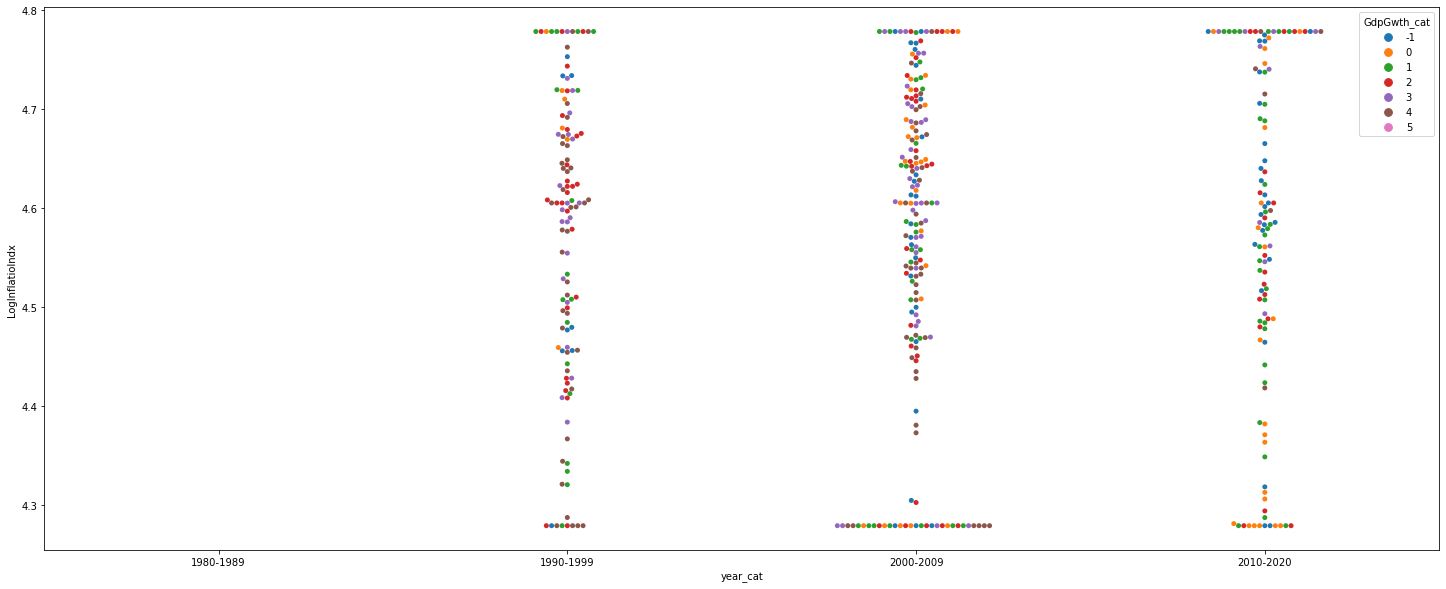

In [54]:
plt.figure(figsize=(25, 10))
sns.swarmplot(x="year_cat", y="LogInflatioIndx", hue='GdpGwth_cat', data=df_o)
plt.show()

In [ ]:
sns.catplot(x="GdpGwth_cat", kind="count", data=df_o, height=5, aspect=2)
plt.show()

In [36]:
# Prediction & Machine learning
df_o.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate
count,555,555,555,555,555,555,555
mean,2,"2,003",5,97,3,69,1
std,2,7,9,15,3,28,1
min,-1,"1,991",1,72,0,30,-0
25%,1,"1,997",1,86,1,44,-0
50%,2,"2,003",1,98,3,67,0
75%,4,"2,009",6,109,5,100,2
max,5,"2,013",30,119,8,107,3


In [171]:
X = df[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']]
y = df['GdpGwth']

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [172]:
y_pred = lr.predict(X)
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)

Intercept: 
 -24.697687367172122
Coefficients: 
 [ 0.01643124 -0.55671055  0.00314456  0.10990379 -0.9452985 ]


In [173]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictionsFull = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                GdpGwth   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     13.59
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           1.63e-12
Time:                        16:57:07   Log-Likelihood:                -1282.9
No. Observations:                 555   AIC:                             2578.
Df Residuals:                     549   BIC:                             2604.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -24.6977     62.54

In [125]:
df_o.describe()

,GdpGwth,Year,FxRate,InflatioIndx,OECDSTInterbkRate,M3,LogFxRate,LogM3,LogInflatioIndx
count,555,555,555,555,555,555,555,555,555
mean,2,"2,003",5,97,3,69,1,4,5
std,2,7,9,15,3,28,1,0,0
min,-1,"1,991",1,72,0,30,-0,3,4
25%,1,"1,997",1,86,1,44,-0,4,4
50%,2,"2,003",1,98,3,67,0,4,5
75%,4,"2,009",6,109,5,100,2,5,5
max,5,"2,013",30,119,8,107,3,5,5


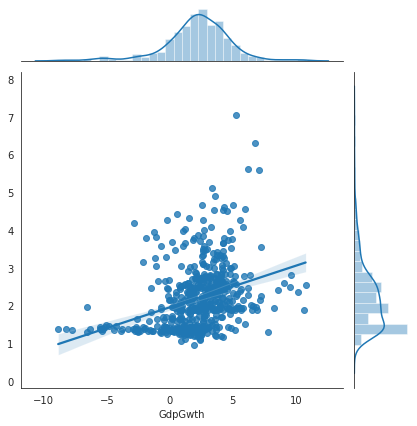

In [129]:
with sns.axes_style ('white'):
    sns.jointplot(y, y_pred, data=df_o ,kind='reg')

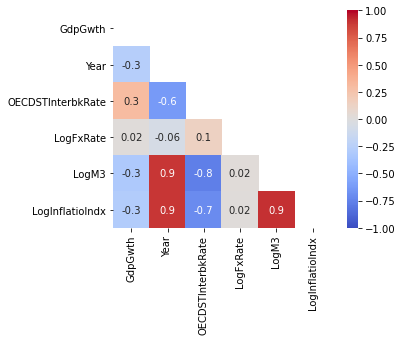

In [154]:
import numpy as np
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot= True, fmt='.1g',vmin=-1, vmax=1,center=0,cmap='coolwarm',
 square=True, mask=matrix)


In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(444, 6) (444,)
(111, 6) (111,)


In [203]:
# Fit train
Lr_train = LinearRegression()
Lr_train.fit(X_train[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']], y_train)
y_predicted_train = Lr_train.predict(
 X_train[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']])

In [204]:
print('Intercept: \n', Lr_train.intercept_)
print('Coefficients: \n', Lr_train.coef_)

Intercept: 
 -30.39296947865642
Coefficients: 
 [ 0.0202996  -0.89598221  0.05800491  0.09617303 -1.05645018]


In [210]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2_train = r2_score(y_train, y_predicted_train)
RMSE_Train = np.sqrt(mean_squared_error(y_train, y_predicted_train))
print ('R2 Train :', R2_train)
print ('RMSE Train :', RMSE_Train)

R2 Train : 0.12187776220249391
RMSE Train : 2.44051731193375


In [211]:
Lr_test = LinearRegression()
y_predicted_test = Lr_train.predict(
 X_test[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']])

In [212]:
Lr_test.fit(X_test[['Year', 'LogInflatioIndx', 'LogFxRate', 'OECDSTInterbkRate', 'LogM3']], y_test)
print('Intercept:\n', Lr_test.intercept_)
print('Coefficients:\n', Lr_test.coef_)

Intercept:
 5.503995686383725
Coefficients:
 [-5.40329006e-04 -6.61595012e-01 -1.88620071e-01  1.66128112e-01
  4.63632669e-02]


In [216]:
R2_test = r2_score(y_test, y_predicted_test)
RMSE_Test = np.sqrt(mean_squared_error(y_test, y_predicted_test))
print ('R2 Test :', R2_test)
print ('RMSE Test :', RMSE_Test)

R2 Test : 0.04433456849982109
RMSE Test : 2.4574324247790975
